# Boosting


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
  return x ** 2

def grad(x):
  return 2 * x

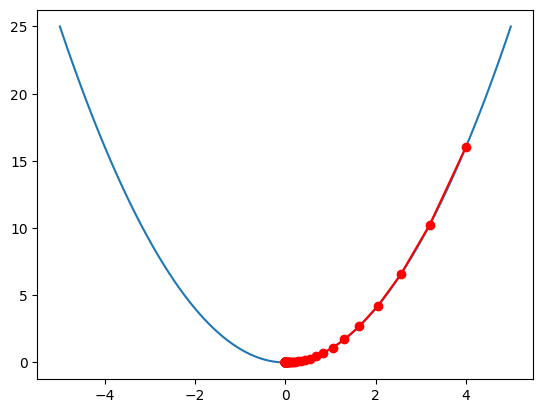

In [18]:
x = np.random.randint(-5, 5)
eta = 0.1
m = 100
X = []
for _ in range(m):
  X.append(x)
  x = x - eta * grad(x)
  
x_ = np.linspace(-5, 5, 100)
y = f(x_)

plt.plot(x_, y)
plt.plot(X, list(map(f, X)), '-o', color='r')
plt.show()

In [ ]:
!pip install catboost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import numpy as np
import pandas as pd

Input: conjunto de entrenamiento $\{(x_i, y_i)\}_{i=1}^n$, función de pérdida diferenciable $L(y, F(x))$, número de iteraciones $M$

Algoritmo:

1. Inicializar el modelo con un valor constante:

$$F_0(x)=\arg \min_{\gamma}\sum_{i=1}^n L(y_i, \gamma)$$

2. For m=1 hasta $M$:
  1. Calcular los pseudo-residuos:
      $$r_{im}=-\bigg[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\bigg]$$
  2. Ajustar un modelo básico $h_m(x)$ a los residuales: $\{(x_i, r_{im})\}_{i=1}^n$
  3. Calcular el multiplicador $\gamma_m$:
      
      $$\gamma_m = \arg \min_{\gamma} \sum_{i=1}^n L(y_i, F_{m-1}(x_i)+\gamma h_m(x_i))$$
  4. Actualizar el output:
      $$F_m(x)=F_{m-1}(x)+\gamma_mh_m(x)$$

Output: $F_M(x)$


In [ ]:
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        
        self.estimators = []
        self.residuals = []
        self.base_prediction = 0
        
    def fit(self, X, y):
        self.base_prediction = np.mean(y)
        self.residuals = y - self.base_prediction
        
        for i in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, self.residuals)
            prediction = tree.predict(X)
            self.estimators.append(tree)
            self.residuals -= self.learning_rate * prediction
            
    def predict(self, X):
        y_pred = np.zeros(len(X))
        for estimator in self.estimators:
            y_pred += self.learning_rate * estimator.predict(X)
        return y_pred + self.base_prediction

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## GradientBoosting

`learning_rate`

`max_depth`

`n_estimators`

`min_samples_split`

`min_samples_leaf`

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
accuracy_score(y_pred_gbc, y_test)

0.97

## HistGradientBoosting

`learning_rate`

`max_leaf_nodes`

`max_depth`

`min_samples_leaf`

In [ ]:
hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train, y_train)
y_pred_hgbc = hgbc.predict(X_test)
accuracy_score(y_pred_hgbc, y_test)

0.945

## XGBoosting

`eta`

`gamma`

`max_depth`

`lambda`

`alpha`


In [ ]:
xbc = XGBClassifier()
xbc.fit(X_train, y_train)
y_pred_xbc = xbc.predict(X_test)
accuracy_score(y_pred_xbc, y_test)

0.96

## LightGBM

`num_leaves`

`max_depth`

`n_estimators`

`learning_rate`

`reg_lambda`

`reg_alpha`

In [ ]:
lgbc = LGBMClassifier()
lgbc.fit(X_train, y_train)
y_pred_lgbc = lgbc.predict(X_test)
accuracy_score(y_pred_lgbc, y_test)

0.955

## CatBoost

`learning_rate`

`max_depth`

`subsample`

`colsample_bylevel`

`l2_leaf_reg`

In [ ]:
cbc = CatBoostClassifier()
cbc.fit(X_train, y_train, verbose=False)
y_pred_cbc = cbc.predict(X_test)
accuracy_score(y_pred_cbc, y_test)

0.985